In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train , y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

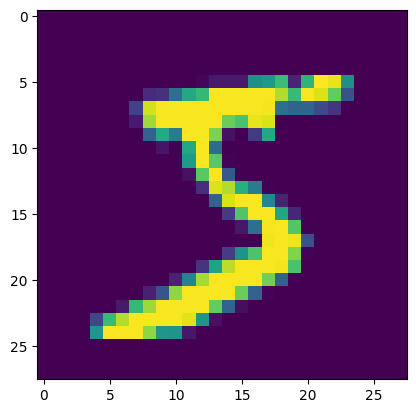

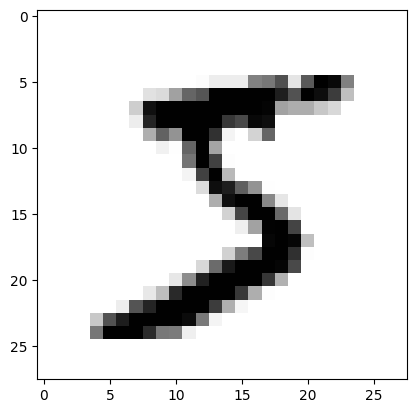

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

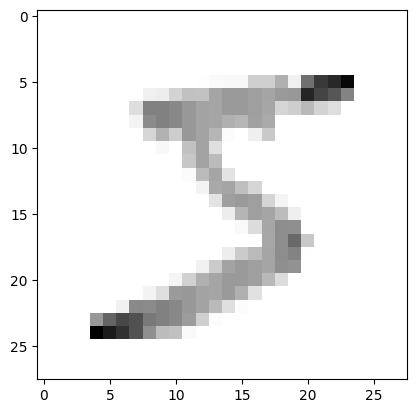

In [8]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)
x_testr = np.array(x_test).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)
print("Training sample dimension : ", x_trainr.shape)
print("Testing sample dimension : " , x_testr.shape)

Training sample dimension :  (60000, 28, 28, 1)
Testing sample dimension :  (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D

In [13]:
model = Sequential()
#1st layer
model.add(Conv2D(64,(3,3) , input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer
model.add(Conv2D(64,(3,3) , input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd layer
model.add(Conv2D(64,(3,3) , input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("Total training sample : " , len(x_trainr))

Total training sample :  60000


In [20]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer = "adam" , metrics=['accuracy'])
model.fit(x_trainr , y_train , epochs=5 , validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7837 - loss: 0.6574 - val_accuracy: 0.9604 - val_loss: 0.1267
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9656 - loss: 0.1117 - val_accuracy: 0.9674 - val_loss: 0.1005
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9782 - loss: 0.0701 - val_accuracy: 0.9767 - val_loss: 0.0730
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9822 - loss: 0.0538 - val_accuracy: 0.9697 - val_loss: 0.0996
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 0.9817 - val_loss: 0.0582


In [21]:
test_loss , test_acc = model.evaluate(x_testr , y_test)
print("test loss on 10,000 test samples : " , test_loss)
print("validation accuracy on 10,000 test samples : " , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0705
test loss on 10,000 test samples :  0.0589328370988369
validation accuracy on 10,000 test samples :  0.9828000068664551


In [22]:
pred = model.predict([x_testr])
print(pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.31504307e-09 5.27701502e-07 1.87695844e-06 ... 9.99994040e-01
  7.97955213e-09 2.48052260e-07]
 [1.66366342e-04 3.87450928e-06 9.99720037e-01 ... 4.86419995e-05
  6.24096583e-06 2.34915149e-07]
 [2.13895692e-08 9.99982595e-01 6.85917882e-07 ... 9.58372766e-06
  3.65260547e-07 3.37520127e-08]
 ...
 [7.50346382e-11 9.23830441e-07 3.81484767e-07 ... 1.27986232e-06
  1.06912630e-08 4.29633729e-07]
 [2.85649912e-05 6.61246125e-09 3.83474452e-09 ... 1.16647335e-07
  1.40504228e-04 5.54304752e-05]
 [2.37023502e-04 5.38139011e-06 6.15336467e-06 ... 1.27205988e-06
  3.85514373e-04 9.40385689e-06]]


In [23]:
print(np.argmax(pred[0]))

7


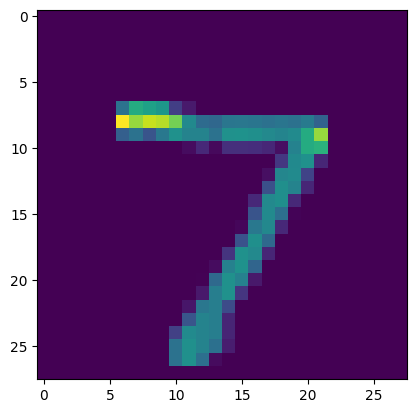

In [24]:
plt.imshow(x_test[0])

In [25]:
print(np.argmax(pred[128]))

8


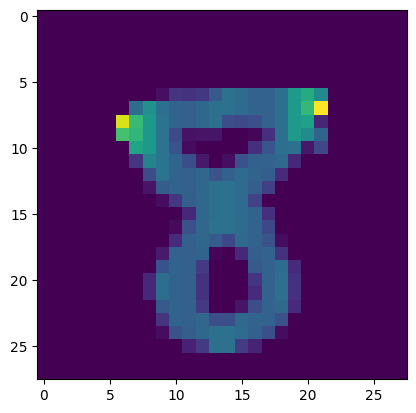

In [27]:
plt.imshow(x_test[128])

In [28]:
import cv2

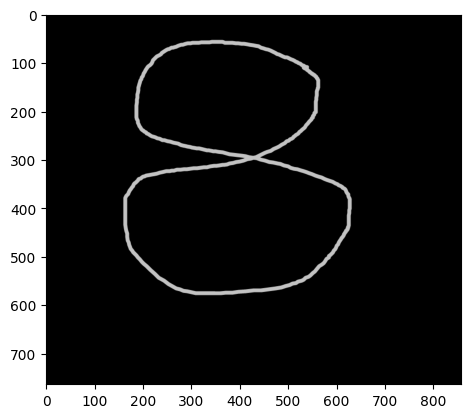

In [37]:
img = cv2.imread('eight.png')
plt.imshow(img)

In [38]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(764, 858)

In [39]:
resi = cv2.resize(gray , (28,28) , interpolation = cv2.INTER_AREA)
resi.shape

(28, 28)

In [40]:
newimg = tf.keras.utils.normalize(resi , axis=1)
newimg = np.array(newimg).reshape(-1 , IMG_SIZE , IMG_SIZE , 1)
newimg.shape

(1, 28, 28, 1)

In [41]:
pred = model.predict(newimg)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[5.06102733e-05 3.29050439e-04 1.10441325e-02 2.28690505e-01
  2.46863975e-03 9.25747096e-04 2.99752894e-04 6.42404048e-05
  7.54987597e-01 1.13976840e-03]]


In [42]:
print(np.argmax(pred))

8
